In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import os

In [4]:
data_path = './fer2013.csv'
def load_data(path=data_path):
    return pd.read_csv(path)

In [5]:
face_data = load_data()

In [6]:
face_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [7]:
# 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
face_data['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f54b4e0>]], dtype=object)

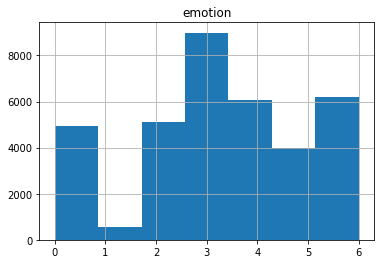

In [8]:
face_data.hist(bins=7)

CNN

In [9]:
face_data['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [16]:
training = face_data.loc[face_data.Usage=='Training']

In [219]:
def show_image(pixels):
    img = np.reshape(pixels, (48, 48))
    plt.imshow(img, cmap='gray')
    plt.title(row.emotion)

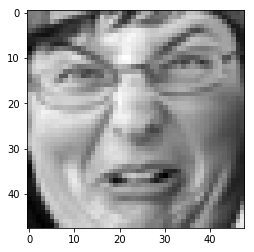

In [31]:
show_image(training[training.emotion==1].iloc[0])

In [33]:
training.head(n=10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [37]:
training.drop(columns='Usage', inplace=True)
training.head(n=10)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,2,255 254 255 254 254 179 122 107 95 124 149 150...


In [58]:
i = 0
for row in training.itertuples():
    if type(row.pixels) != str:
        continue
    img = np.fromstring(row.pixels, sep=' ', dtype='uint8')
    training.at[row.Index, 'pixels'] = img

training.info()

def fuck_you(name):
    x = pd.read_pickle(name)
    for row in x.itertuples():
        img = row.pixels.flatten()
        x.at[row.Index, 'pixels'] = img
    
    x.to_pickle(name)
    return x
    
strat_test_set = fuck_you("small_training_set.pkl")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28709 entries, 0 to 28708
Data columns (total 2 columns):
emotion    28709 non-null int64
pixels     28709 non-null object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [60]:
training.to_pickle('training_set.pkl')

In [64]:
public_test = face_data.loc[face_data.Usage=='PublicTest']
public_test.drop(columns='Usage', inplace=True)
for row in public_test.itertuples():
    if type(row.pixels) != str:
        continue
    img = np.reshape(np.fromstring(row.pixels, sep=' ', dtype='uint8'), (48, 
                                                                        48))
    public_test.at[row.Index, 'pixels'] = img
    
public_test.info()

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3589 entries, 32298 to 35886
Data columns (total 2 columns):
emotion    3589 non-null int64
pixels     3589 non-null object
dtypes: int64(1), object(1)
memory usage: 244.1+ KB


In [66]:
training

,emotion,pixels
0,0,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,0,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,2,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,4,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,6,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."
5,2,"[[55, 55, 55, 55, 55, 54, 60, 68, 54, 85, 151,..."
6,4,"[[20, 17, 19, 21, 25, 38, 42, 42, 46, 54, 56, ..."
7,3,"[[77, 78, 79, 79, 78, 75, 60, 55, 47, 48, 58, ..."
8,3,"[[85, 84, 90, 121, 101, 102, 133, 153, 153, 16..."
9,2,"[[255, 254, 255, 254, 254, 179, 122, 107, 95, ..."


### Stratified shiffle split

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit

In [68]:
sub_set_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, 
                                     random_state=69)

In [70]:
for train_index, test_index in sub_set_split.split(training, training[
    'emotion']): 
    strat_test_set = training.loc[test_index]

In [73]:
strat_test_set.emotion.value_counts()/len(strat_test_set)

3    0.251306
6    0.172936
4    0.168234
2    0.142807
0    0.139150
5    0.110414
1    0.015152
Name: emotion, dtype: float64

In [75]:
len(strat_test_set)

5742

In [76]:
strat_test_set.to_pickle('small_training_set.pkl')

In [83]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
sm_training_1hot = encoder.fit_transform(strat_test_set.emotion.reshape(-1, 1))
sm_training_1hot

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


<5742x7 sparse matrix of type '<class 'numpy.float64'>'
	with 5742 stored elements in Compressed Sparse Row format>

In [183]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.utils import to_categorical

In [207]:
def get_data_and_labels(df):
    test_data = df.as_matrix(columns=['pixels'])[:, 0]
    test_data = np.array(test_data.tolist())
    # train_data = train_data.reshape(-1, 48, 48)
    test_data = test_data.astype('float32')
    test_data /= 255
    # print(test_data[0])
    test_label = df.as_matrix(columns=['emotion'])
    test_label.shape
    test_label_1hot = to_categorical(test_label)
    test_label_1hot.shape
    return test_data, test_label_1hot

In [209]:
train_data, train_label_1hot = get_data_and_labels(training)
test_data, test_label_1hot = get_data_and_labels(public_test)

In [215]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(48*48, )))
model.add(Dense(512, activation='relu'))
model.add(Dense(train_label_1hot.shape[1], activation='softmax'))

In [216]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [217]:
history = model.fit(train_data, train_label_1hot, batch_size=9288, epochs=20, 
                    verbose=True, validation_data=(test_data, test_label_1hot))

Train on 28709 samples, validate on 3589 samples
Epoch 1/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.9722 - acc: 0.1390

18576/28709 [==================>...........] - ETA: 1s - loss: 6.8409 - acc: 0.1955

27864/28709 [============================>.] - ETA: 0s - loss: 9.0587 - acc: 0.1842

28709/28709 [==============================] - 5s 181us/step - loss: 9.1642 - acc: 0.1837 - val_loss: 13.1990 - val_acc: 0.1382


Epoch 2/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 13.0412 - acc: 0.1472

18576/28709 [==================>...........] - ETA: 1s - loss: 12.8759 - acc: 0.1621

27864/28709 [============================>.] - ETA: 0s - loss: 9.8983 - acc: 0.1538 

28709/28709 [==============================] - 5s 171us/step - loss: 9.7198 - acc: 0.1569 - val_loss: 2.7395 - val_acc: 0.1293


Epoch 3/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 2.7516 - acc: 0.1392

18576/28709 [==================>...........] - ETA: 1s - loss: 2.4018 - acc: 0.1549

27864/28709 [============================>.] - ETA: 0s - loss: 2.2377 - acc: 0.1854

28709/28709 [==============================] - 5s 171us/step - loss: 2.2286 - acc: 0.1845 - val_loss: 1.8856 - val_acc: 0.2494


Epoch 4/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8884 - acc: 0.2499

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8588 - acc: 0.2526

27864/28709 [============================>.] - ETA: 0s - loss: 1.8533 - acc: 0.2522

28709/28709 [==============================] - 5s 177us/step - loss: 1.8537 - acc: 0.2518 - val_loss: 1.8190 - val_acc: 0.2494


Epoch 5/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8143 - acc: 0.2495

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8178 - acc: 0.2525

27864/28709 [============================>.] - ETA: 0s - loss: 1.8184 - acc: 0.2524

28709/28709 [==============================] - 5s 169us/step - loss: 1.8187 - acc: 0.2517 - val_loss: 1.8667 - val_acc: 0.1691


Epoch 6/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8694 - acc: 0.1830

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8520 - acc: 0.2151

27864/28709 [============================>.] - ETA: 0s - loss: 1.8468 - acc: 0.1991

28709/28709 [==============================] - 5s 186us/step - loss: 1.8469 - acc: 0.1999 - val_loss: 1.8300 - val_acc: 0.2237


Epoch 7/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8183 - acc: 0.2258

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8160 - acc: 0.2407

27864/28709 [============================>.] - ETA: 0s - loss: 1.8156 - acc: 0.2445

28709/28709 [==============================] - 5s 172us/step - loss: 1.8155 - acc: 0.2440 - val_loss: 1.8446 - val_acc: 0.1953


Epoch 8/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8427 - acc: 0.1912

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8440 - acc: 0.2245

27864/28709 [============================>.] - ETA: 0s - loss: 1.8674 - acc: 0.2039

28709/28709 [==============================] - 5s 171us/step - loss: 1.8676 - acc: 0.2053 - val_loss: 1.8534 - val_acc: 0.1889


Epoch 9/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8513 - acc: 0.1969

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8442 - acc: 0.2258

27864/28709 [============================>.] - ETA: 0s - loss: 1.8352 - acc: 0.2372

28709/28709 [==============================] - 5s 172us/step - loss: 1.8344 - acc: 0.2378 - val_loss: 1.8172 - val_acc: 0.2538


Epoch 10/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8141 - acc: 0.2492

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8162 - acc: 0.2519

27864/28709 [============================>.] - ETA: 0s - loss: 1.8192 - acc: 0.2429

28709/28709 [==============================] - 5s 186us/step - loss: 1.8185 - acc: 0.2442 - val_loss: 1.8461 - val_acc: 0.1814


Epoch 11/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8347 - acc: 0.1998

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8238 - acc: 0.2277

27864/28709 [============================>.] - ETA: 0s - loss: 1.8175 - acc: 0.2354

28709/28709 [==============================] - 5s 181us/step - loss: 1.8173 - acc: 0.2360 - val_loss: 1.9353 - val_acc: 0.2586


Epoch 12/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.9308 - acc: 0.2583

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8822 - acc: 0.2525

27864/28709 [============================>.] - ETA: 0s - loss: 1.8634 - acc: 0.2569

28709/28709 [==============================] - 5s 180us/step - loss: 1.8647 - acc: 0.2551 - val_loss: 1.8847 - val_acc: 0.1895


Epoch 13/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8856 - acc: 0.1771

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8554 - acc: 0.2160

27864/28709 [============================>.] - ETA: 0s - loss: 1.8500 - acc: 0.2127

28709/28709 [==============================] - 5s 174us/step - loss: 1.8491 - acc: 0.2136 - val_loss: 1.8224 - val_acc: 0.2134


Epoch 14/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8261 - acc: 0.1998

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8301 - acc: 0.2256

27864/28709 [============================>.] - ETA: 0s - loss: 1.8462 - acc: 0.2093

28709/28709 [==============================] - 6s 208us/step - loss: 1.8482 - acc: 0.2104 - val_loss: 1.8569 - val_acc: 0.2079


Epoch 15/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8592 - acc: 0.1919

18576/28709 [==================>...........] - ETA: 2s - loss: 1.8343 - acc: 0.2208

27864/28709 [============================>.] - ETA: 0s - loss: 1.8212 - acc: 0.2337

28709/28709 [==============================] - 6s 203us/step - loss: 1.8204 - acc: 0.2346 - val_loss: 1.8442 - val_acc: 0.1889


Epoch 16/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8466 - acc: 0.1968

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8409 - acc: 0.2258

27864/28709 [============================>.] - ETA: 0s - loss: 1.8313 - acc: 0.2374

28709/28709 [==============================] - 5s 177us/step - loss: 1.8310 - acc: 0.2367 - val_loss: 1.7985 - val_acc: 0.2488


Epoch 17/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8015 - acc: 0.2524

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8585 - acc: 0.2077

27864/28709 [============================>.] - ETA: 0s - loss: 1.8813 - acc: 0.2228

28709/28709 [==============================] - 6s 193us/step - loss: 1.8806 - acc: 0.2208 - val_loss: 1.8448 - val_acc: 0.2497


Epoch 18/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8457 - acc: 0.2503

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8762 - acc: 0.1968

27864/28709 [============================>.] - ETA: 0s - loss: 1.8561 - acc: 0.2153

28709/28709 [==============================] - 5s 170us/step - loss: 1.8545 - acc: 0.2171 - val_loss: 1.8164 - val_acc: 0.2697


Epoch 19/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8121 - acc: 0.2719

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8349 - acc: 0.2592

27864/28709 [============================>.] - ETA: 0s - loss: 1.8389 - acc: 0.2354

28709/28709 [==============================] - 5s 171us/step - loss: 1.8390 - acc: 0.2353 - val_loss: 1.8114 - val_acc: 0.2307


Epoch 20/20


 9288/28709 [========>.....................] - ETA: 3s - loss: 1.8151 - acc: 0.2199

18576/28709 [==================>...........] - ETA: 1s - loss: 1.8064 - acc: 0.2379

27864/28709 [============================>.] - ETA: 0s - loss: 1.8098 - acc: 0.2335

28709/28709 [==============================] - 5s 169us/step - loss: 1.8106 - acc: 0.2337 - val_loss: 1.9306 - val_acc: 0.1402


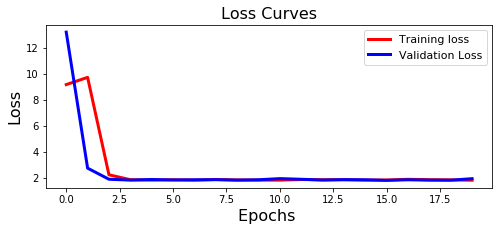

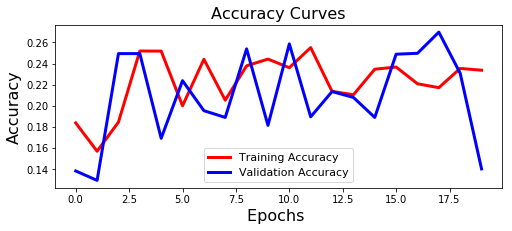

In [241]:
def plot_history(history):
    #Plot the Loss Curves
    plt.figure(figsize=[8,3])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=11)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
     
    #Plot the Accuracy Curves
    plt.figure(figsize=[8,3])
    plt.plot(history.history['acc'],'r',linewidth=3.0)
    plt.plot(history.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=11)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
plot_history(history)

In [213]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 3591      
Total params: 1,446,407
Trainable params: 1,446,407
Non-trainable params: 0
_________________________________________________________________


[[ 0.13648045  0.00734268  0.32454294  0.1288342   0.19690579  0.11045548
   0.09543841]]


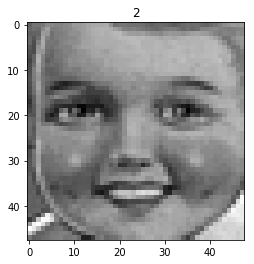

In [240]:
im = 30
show_image(test_data[im])
print(model.predict(test_data[[im]]))

In [265]:
from keras.layers import Dropout

dimData = train_data.shape[1]
model_reg = Sequential()
model_reg.add(Dense(dimData, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(dimData, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(len(train_label_1hot[0]), activation='softmax'))

In [266]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=[
    'accuracy'])
history_reg = model_reg.fit(train_data, train_label_1hot, batch_size=4096, 
                            epochs=10, 
                            verbose=True, 
                            validation_data=(test_data, test_label_1hot)
                            )

Train on 28709 samples, validate on 3589 samples
Epoch 1/10


 4096/28709 [===>..........................] - ETA: 27s - loss: 2.0971 - acc: 0.1658

 8192/28709 [=======>......................] - ETA: 21s - loss: 7.6601 - acc: 0.1715

12288/28709 [===========>..................] - ETA: 17s - loss: 9.1233 - acc: 0.1984

16384/28709 [================>.............] - ETA: 12s - loss: 9.8366 - acc: 0.2128

20480/28709 [====================>.........] - ETA: 8s - loss: 10.2855 - acc: 0.2204

24576/28709 [========================>.....] - ETA: 4s - loss: 10.5786 - acc: 0.2257

28672/28709 [============================>.] - ETA: 0s - loss: 10.7916 - acc: 0.2294

28709/28709 [==============================] - 31s 1ms/step - loss: 10.7939 - acc: 0.2293 - val_loss: 12.0947 - val_acc: 0.2494


Epoch 2/10


 4096/28709 [===>..........................] - ETA: 25s - loss: 11.9750 - acc: 0.2568

 8192/28709 [=======>......................] - ETA: 20s - loss: 11.9499 - acc: 0.2582

12288/28709 [===========>..................] - ETA: 16s - loss: 11.9725 - acc: 0.2569

16384/28709 [================>.............] - ETA: 12s - loss: 12.0514 - acc: 0.2520

20480/28709 [====================>.........] - ETA: 8s - loss: 12.0521 - acc: 0.2520 

24576/28709 [========================>.....] - ETA: 4s - loss: 12.0491 - acc: 0.2521

28672/28709 [============================>.] - ETA: 0s - loss: 12.0621 - acc: 0.2513

28709/28709 [==============================] - 30s 1ms/step - loss: 12.0623 - acc: 0.2513 - val_loss: 12.0947 - val_acc: 0.2494


Epoch 3/10


 4096/28709 [===>..........................] - ETA: 24s - loss: 12.0654 - acc: 0.2515

 8192/28709 [=======>......................] - ETA: 20s - loss: 12.1269 - acc: 0.2473

12288/28709 [===========>..................] - ETA: 16s - loss: 12.0934 - acc: 0.2493

16384/28709 [================>.............] - ETA: 12s - loss: 12.1017 - acc: 0.2488

20480/28709 [====================>.........] - ETA: 8s - loss: 12.0605 - acc: 0.2515 

24576/28709 [========================>.....] - ETA: 4s - loss: 12.0707 - acc: 0.2508

28672/28709 [============================>.] - ETA: 0s - loss: 12.0615 - acc: 0.2514

28709/28709 [==============================] - 31s 1ms/step - loss: 12.0622 - acc: 0.2513 - val_loss: 12.0947 - val_acc: 0.2494


Epoch 4/10


 4096/28709 [===>..........................] - ETA: 24s - loss: 12.2228 - acc: 0.2415

 8192/28709 [=======>......................] - ETA: 20s - loss: 12.1616 - acc: 0.2454

12288/28709 [===========>..................] - ETA: 16s - loss: 12.1638 - acc: 0.2451

16384/28709 [================>.............] - ETA: 12s - loss: 12.1246 - acc: 0.2475

20480/28709 [====================>.........] - ETA: 8s - loss: 12.0697 - acc: 0.2508 

24576/28709 [========================>.....] - ETA: 4s - loss: 12.0705 - acc: 0.2508

28672/28709 [============================>.] - ETA: 0s - loss: 12.0625 - acc: 0.2513

28709/28709 [==============================] - 31s 1ms/step - loss: 12.0621 - acc: 0.2513 - val_loss: 12.0947 - val_acc: 0.2494


Epoch 5/10


 4096/28709 [===>..........................] - ETA: 24s - loss: 11.8494 - acc: 0.2646

 8192/28709 [=======>......................] - ETA: 20s - loss: 11.9775 - acc: 0.2565

12288/28709 [===========>..................] - ETA: 16s - loss: 12.0383 - acc: 0.2528

16384/28709 [================>.............] - ETA: 12s - loss: 12.0595 - acc: 0.2514

20480/28709 [====================>.........] - ETA: 8s - loss: 12.0552 - acc: 0.2517 

24576/28709 [========================>.....] - ETA: 4s - loss: 12.0654 - acc: 0.2511

28672/28709 [============================>.] - ETA: 0s - loss: 12.0606 - acc: 0.2514

28709/28709 [==============================] - 30s 1ms/step - loss: 12.0608 - acc: 0.2514 - val_loss: 14.0182 - val_acc: 0.1301


Epoch 6/10


 4096/28709 [===>..........................] - ETA: 24s - loss: 14.0040 - acc: 0.1311

 8192/28709 [=======>......................] - ETA: 20s - loss: 13.9573 - acc: 0.1340

12288/28709 [===========>..................] - ETA: 16s - loss: 13.9329 - acc: 0.1355

16384/28709 [================>.............] - ETA: 12s - loss: 13.8921 - acc: 0.1380

20480/28709 [====================>.........] - ETA: 8s - loss: 13.8746 - acc: 0.1391 

24576/28709 [========================>.....] - ETA: 4s - loss: 13.8662 - acc: 0.1396

28672/28709 [============================>.] - ETA: 0s - loss: 13.8727 - acc: 0.1392

28709/28709 [==============================] - 30s 1ms/step - loss: 13.8734 - acc: 0.1392 - val_loss: 14.0181 - val_acc: 0.1301


Epoch 7/10


 4096/28709 [===>..........................] - ETA: 24s - loss: 13.7734 - acc: 0.1453

 8192/28709 [=======>......................] - ETA: 20s - loss: 13.8284 - acc: 0.1420

12288/28709 [===========>..................] - ETA: 16s - loss: 13.8663 - acc: 0.1396

16384/28709 [================>.............] - ETA: 12s - loss: 13.8855 - acc: 0.1384

20480/28709 [====================>.........] - ETA: 8s - loss: 13.8934 - acc: 0.1379 

24576/28709 [========================>.....] - ETA: 4s - loss: 13.8833 - acc: 0.1385

28672/28709 [============================>.] - ETA: 0s - loss: 13.8715 - acc: 0.1393

28709/28709 [==============================] - 31s 1ms/step - loss: 13.8733 - acc: 0.1392 - val_loss: 14.0179 - val_acc: 0.1301


Epoch 8/10


 4096/28709 [===>..........................] - ETA: 25s - loss: 13.7615 - acc: 0.1462

 8192/28709 [=======>......................] - ETA: 21s - loss: 13.8346 - acc: 0.1417

12288/28709 [===========>..................] - ETA: 17s - loss: 13.8680 - acc: 0.1396

16384/28709 [================>.............] - ETA: 12s - loss: 13.8875 - acc: 0.1384

20480/28709 [====================>.........] - ETA: 8s - loss: 13.8832 - acc: 0.1386 

24576/28709 [========================>.....] - ETA: 4s - loss: 13.8771 - acc: 0.1390

28672/28709 [============================>.] - ETA: 0s - loss: 13.8608 - acc: 0.1393

28709/28709 [==============================] - 31s 1ms/step - loss: 13.8598 - acc: 0.1394 - val_loss: 12.0947 - val_acc: 0.2494


Epoch 9/10


 4096/28709 [===>..........................] - ETA: 24s - loss: 12.2244 - acc: 0.2412

 8192/28709 [=======>......................] - ETA: 20s - loss: 12.1409 - acc: 0.2465

12288/28709 [===========>..................] - ETA: 16s - loss: 12.0975 - acc: 0.2491

16384/28709 [================>.............] - ETA: 12s - loss: 12.1140 - acc: 0.2482

20480/28709 [====================>.........] - ETA: 8s - loss: 12.0933 - acc: 0.2494 

24576/28709 [========================>.....] - ETA: 4s - loss: 12.0736 - acc: 0.2507

28672/28709 [============================>.] - ETA: 0s - loss: 12.0636 - acc: 0.2512

28709/28709 [==============================] - 30s 1ms/step - loss: 12.0621 - acc: 0.2513 - val_loss: 12.0946 - val_acc: 0.2494


Epoch 10/10


 4096/28709 [===>..........................] - ETA: 24s - loss: 12.2106 - acc: 0.2424

 8192/28709 [=======>......................] - ETA: 20s - loss: 12.0303 - acc: 0.2533

12288/28709 [===========>..................] - ETA: 16s - loss: 12.0529 - acc: 0.2520

16384/28709 [================>.............] - ETA: 12s - loss: 12.0393 - acc: 0.2528

20480/28709 [====================>.........] - ETA: 8s - loss: 12.0744 - acc: 0.2506 

24576/28709 [========================>.....] - ETA: 4s - loss: 12.0455 - acc: 0.2525

28672/28709 [============================>.] - ETA: 0s - loss: 12.0613 - acc: 0.2515

28709/28709 [==============================] - 35s 1ms/step - loss: 12.0620 - acc: 0.2515 - val_loss: 12.0946 - val_acc: 0.2497


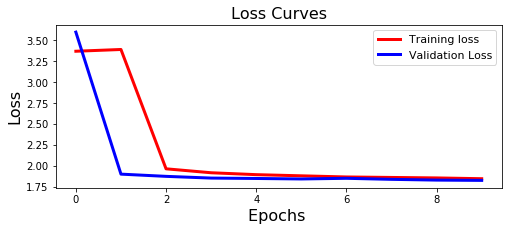

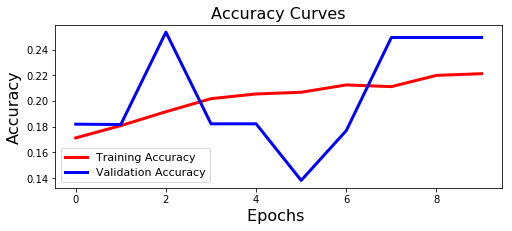

In [264]:
plot_history(history_reg)

In [268]:
def save_model(model, name):
    model_json = model.to_json()
    with open(name+'.json', 'w') as json_file:
        json_file.write(model_json)
    model.save_weights(name+'.h5')
    print('Saved to: {}'.format(name+'.json/.h5'))

save_model(model_reg, "model_reg")

Saved to: model_reg.json/.h5


In [269]:
save_model(model, "model")

Saved to: model.json/.h5


CNN

In [287]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Reshape

nClasses = len(train_label_1hot[0])

cnn_model = Sequential()
cnn_model.add(Reshape((48, 48, 1), input_shape=(dimData, )))
cnn_model.add(Conv2D(32, (3, 3), padding='same', activation='relu', 
                     # input_shape=(48, 48, 1)
                     ))
cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(nClasses, activation='softmax'))

cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 48, 48, 1)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 23, 23, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 21, 21, 64)        36928     
__________

In [288]:
cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [291]:
# cnn_history = cnn_model.fit(train_data, train_label_1hot, batch_size=9192, 
#                             epochs=10, validation_data=(test_data, 
#                                                         test_label_1hot), 
#                             verbose=True)

In [294]:
from keras.models import load_model

cnn_model = load_model('/Users/chandansiyag/Downloads/cnn_model_epoch_100.dms')

In [295]:
cnn_model.predict_on_batch(test_data)

array([[  3.93494993e-01,   4.82167266e-02,   2.86410779e-01, ...,
          2.04660356e-01,   5.06414613e-03,   6.21059425e-02],
       [  3.06227710e-02,   3.07092275e-02,   5.02931252e-02, ...,
          7.64832050e-02,   6.61568629e-05,   4.11447018e-01],
       [  4.41061109e-01,   3.19670467e-03,   5.87202273e-02, ...,
          3.59028190e-01,   2.51233554e-03,   1.35429874e-01],
       ..., 
       [  2.45805527e-03,   3.96287220e-07,   1.30079687e-02, ...,
          7.40039527e-01,   2.29833703e-02,   3.66570312e-03],
       [  5.92330396e-01,   1.65296058e-07,   8.53093714e-02, ...,
          1.94793135e-01,   7.08898902e-02,   5.63619733e-02],
       [  7.37546757e-03,   3.31796315e-07,   1.25141758e-02, ...,
          8.84778500e-02,   1.90312266e-02,   8.64603341e-01]], dtype=float32)

In [313]:
i = 0

In [335]:
images = test_data[i:i+5]
key = np.array(range(len(test_label_1hot[0])))
ans = np.array([key[x==1] for x in test_label_1hot[i:i+5]]).flatten()
ans = [emotions[x] for x in ans]
predictions = cnn_model.predict_classes(images)
images = np.reshape(images, (-1, 48, 48))
emotions = {0:'Angry', 1:'Disguste', 2:'Fear', 3:'Happy', 
            4:'Sad', 5:'Surprise', 6:'Neutral'}
labels = [emotions[x] for x in predictions]

[['Happy' 'Sad' 'Sad' 'Neutral' 'Surprise']
 ['Happy' 'Fear' 'Angry' 'Fear' 'Angry']]


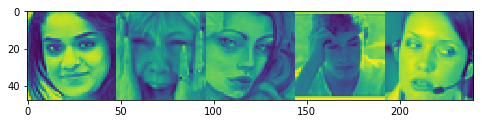

In [336]:
plt.figure(figsize=[8, 6])
plt.imshow(np.hstack(images))
print(np.vstack([labels, ans]))
i = i+5

In [325]:
ans

array([0, 1, 4, 6, 3])

In [349]:
training.emotion.value_counts()/len(training)

3    0.251315
6    0.172942
4    0.168240
2    0.142708
0    0.139155
5    0.110453
1    0.015187
Name: emotion, dtype: float64

In [351]:
(public_test.emotion.value_counts()+private_test.emotion.value_counts())/(
    len(public_test) + len(private_test))*100

0    13.346336
1     1.546392
2    14.265812
3    24.714405
4    17.372527
5    11.577041
6    17.177487
Name: emotion, dtype: float64

In [350]:
training.emotion.value_counts()/len(training)-(public_test.emotion.value_counts()+private_test.emotion.value_counts())/(
    len(public_test) + len(private_test))

0    0.005692
1   -0.000277
2    0.000050
3    0.004171
4   -0.005485
5   -0.005317
6    0.001167
Name: emotion, dtype: float64

In [345]:
public_test.emotion.value_counts()

3    895
4    653
6    607
2    496
0    467
5    415
1     56
Name: emotion, dtype: int64

In [352]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 48, 48, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        36928     
__________

In [362]:
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import SVG, display

In [364]:
display(SVG(model_to_dot(cnn_model).create(prog='dot', format='svg')))

<IPython.core.display.SVG object>

ModuleNotFoundError: No module named 'graphviz'

In [367]:
from keras.preprocessing.image import ImageDataGenerator

In [511]:
generator = ImageDataGenerator(
#           zoom_range=0.2, # randomly zoom into images
      rotation_range=30,  # randomly rotate images in the range (degrees, 
    # 0 to 180)
        width_shift_range=0.1,  # (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,
        fill_mode='nearest')  # randomly flip images
iterator = generator.flow(np.array(train_data_2d), train_label_1hot, 
                          batch_size=1, 
                          save_to_dir='./', save_prefix='face')
count = 0

In [512]:
imgs = np.empty((4, 48, 48))
for x, y  in next(iterator):
    imgs[count] = np.reshape(x, (48, 48))
    count = count + 1
    if count > 4:
        break
count = 0
# ims = np.reshape(x, (len(x), 48, 48))
# ims = np.hstack(ims)
# o_ims = train_data_2d[count*4:count*4+4]
# o_ims = np.reshape(o_ims, (len(x), 48, 48))
# o_ims = np.hstack(o_ims[:])
# ims = np.vstack([ims, o_ims])
# count = count + 4
plt.imshow(np.hstack(imgs[:2]))

ValueError: not enough values to unpack (expected 2, got 1)

In [496]:
np.set_printoptions(precision=1)
imgs[1]

array([[  7.8e-003,   7.8e-003,   7.8e-003, ...,   7.8e-003,   7.8e-003,
          7.8e-003],
       [  7.8e-003,   7.8e-003,   7.8e-003, ...,   7.8e-003,   7.8e-003,
          7.8e-003],
       [  7.8e-003,   7.8e-003,   7.8e-003, ...,   7.8e-003,   7.8e-003,
          7.8e-003],
       ..., 
       [  5.6e-313,   4.0e-011,   2.2e-314, ...,   8.3e-008,   9.8e-008,
          1.1e-007],
       [  1.4e-007,   1.7e-007,   2.0e-007, ...,   3.4e-004,   4.0e-004,
          4.6e-004],
       [  5.6e-004,   6.8e-004,   8.0e-004, ...,   2.2e-314,   5.6e-313,
          1.9e+000]])

In [2]:
# training_2d = np.zeros(shape=(len(train_data), 1))
test_2d = np.empty(shape=(len(test_data), 48, 48))

for i in range(len(test_2d)):
    im = np.reshape(test_data[i], (48, 48))
    test_2d[i] = im
test_data_2d = test_data_2d.reshape((len(test_data), 48, 48, 1))

NameError: name 'np' is not defined

In [384]:
training_2d.ndim

3

In [389]:
train_data_2d = training_2d.reshape((len(train_data), 48, 48, 1))

In [394]:
train_data_2d[0, :, :, 0]

array([[ 0.27450982,  0.3137255 ,  0.32156864, ...,  0.20392157,
         0.16862746,  0.16078432],
       [ 0.25490198,  0.23921569,  0.22745098, ...,  0.21960784,
         0.20392157,  0.17254902],
       [ 0.19607843,  0.16862746,  0.21176471, ...,  0.19215687,
         0.21960784,  0.18431373],
       ..., 
       [ 0.35686275,  0.25490198,  0.16470589, ...,  0.28235295,
         0.21960784,  0.16862746],
       [ 0.3019608 ,  0.32156864,  0.30980393, ...,  0.41176471,
         0.27450982,  0.18039216],
       [ 0.3019608 ,  0.28235295,  0.32941177, ...,  0.41568628,
         0.42745098,  0.32156864]])

In [414]:
o_ims = train_data_2d[count*4:count*4+4]
ims = np.reshape(o_ims, (len(x), 48, 48))
ims = np.hstack(ims[:])

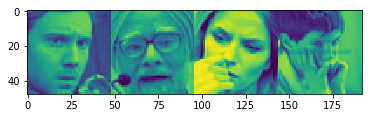

In [415]:
plt.imshow(ims)